# Gold Price Prediction : Machine Learning Project

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="stack_data")
warnings.filterwarnings("ignore", category=UserWarning, module="executing")

In [3]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('gld_price_data.csv')

# Perfroming EDA to get insights from our data and make it suitable for model fitting

In [4]:
# print first 5 rows in the dataframe
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print last 5 rows of the dataframe
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
df.shape

(2290, 6)

In [7]:
# getting some basic informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the number of missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting the statistical measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
# find the unique values for categorical features
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Date
['1/2/2008' '1/3/2008' '1/4/2008' ... '5/10/2018' '5/14/2018' '5/16/2018']


# 1. Finding the unwanted column

# 2. Find missing values

In [11]:
features_na=[features for features in df.columns if df[features].isnull().sum() >0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(),4), '%missing values')
else:
    print("No missing values found")

No missing values found


# 3. Find feature with one value

In [12]:
for column in df.columns:   
    print(column,df[column].nunique())   # see the number of unique values for each column

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


# 4. Explore the cateorical feature

In [13]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='object') & (feature not in ['GLD']))]
categorical_features

['Date']

# 5. Explore the numerical feature

In [14]:
# list of numerical variables
numerical_features=[feature for feature in df.columns if ((df[feature].dtypes != 'object') & (feature not in ['GLD']))]
print('number of numerical variables: ', len(numerical_features))

number of numerical variables:  4


# 6. Find discrete numerical feature

In [15]:
discrete_features=[feature for feature in numerical_features if len(df[feature].unique()) < 25]
print('Discrete variables count: {} '.format(len(discrete_features)))

Discrete variables count: 0 


# 7. Find continuous numerical feature

In [16]:
continous_features=[feature for feature in numerical_features if feature not in discrete_features+['GOD']]
print('Continous feature count: {} '.format(len(continous_features)))

Continous feature count: 4 


# 8. Find outliers in numerical features

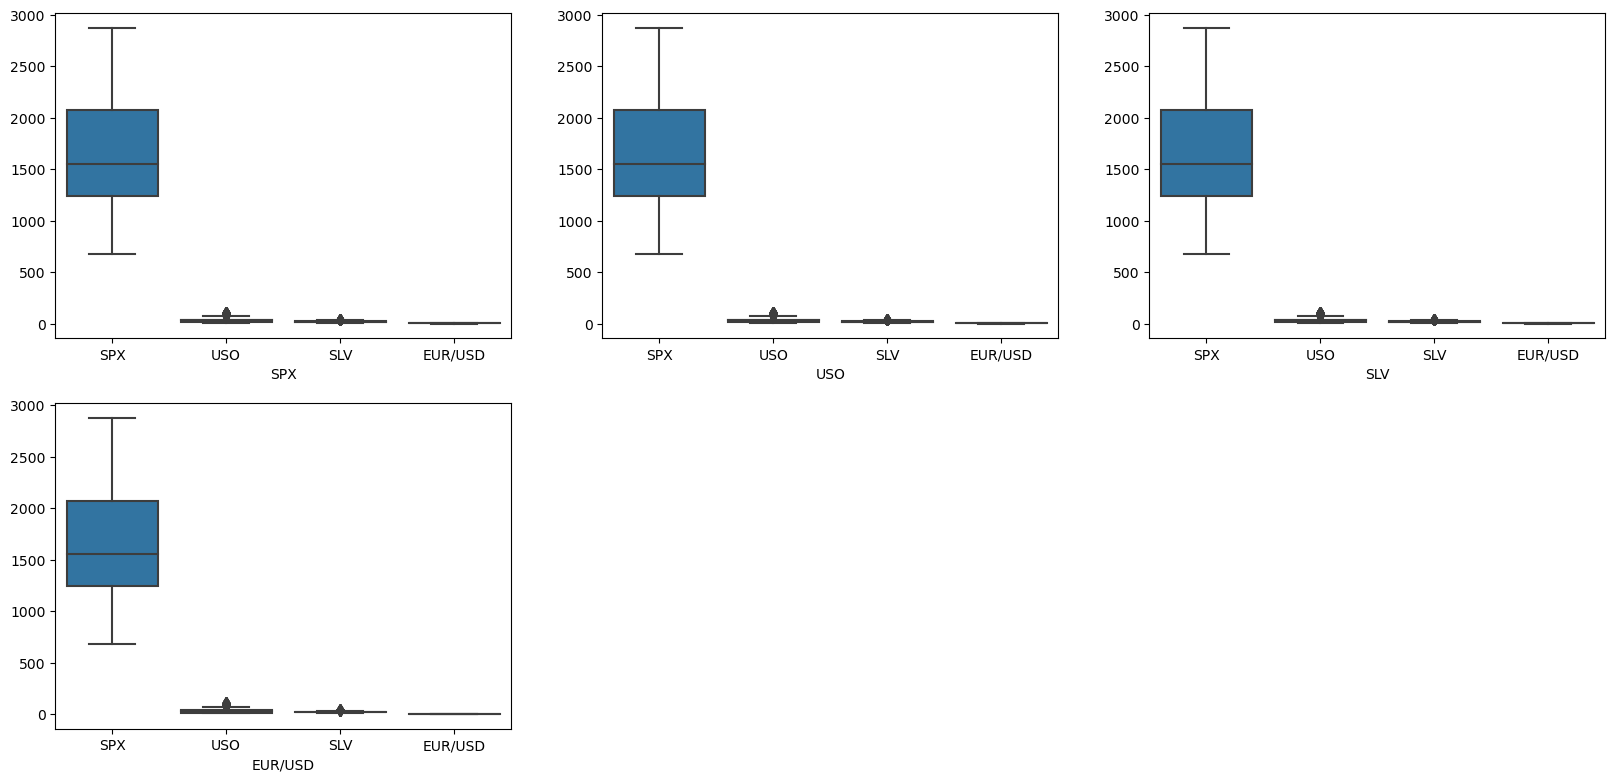

In [17]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber=1
for numerical_feature in numerical_features:
    ax=plt.subplot(12,3, plotnumber)
    sns.boxplot(df[numerical_features])
    plt.xlabel(numerical_feature)
    plotnumber += 1
plt.show()

# 9. Checking for the co-relation between numerical features

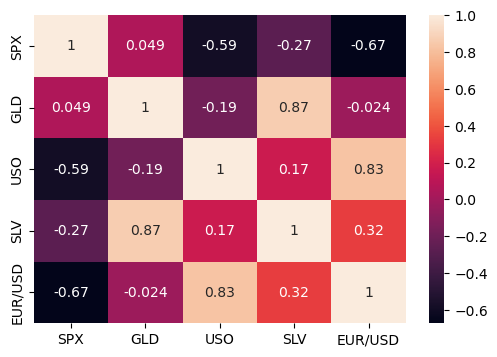

In [20]:
df=df.select_dtypes(include='number')
cor_mat=df.corr()
fig=plt.figure(figsize=(6,4))
sns.heatmap(cor_mat, annot=True)
plt.show()

In [21]:
print(cor_mat['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



# Perfroming Visualization to see the distribution 

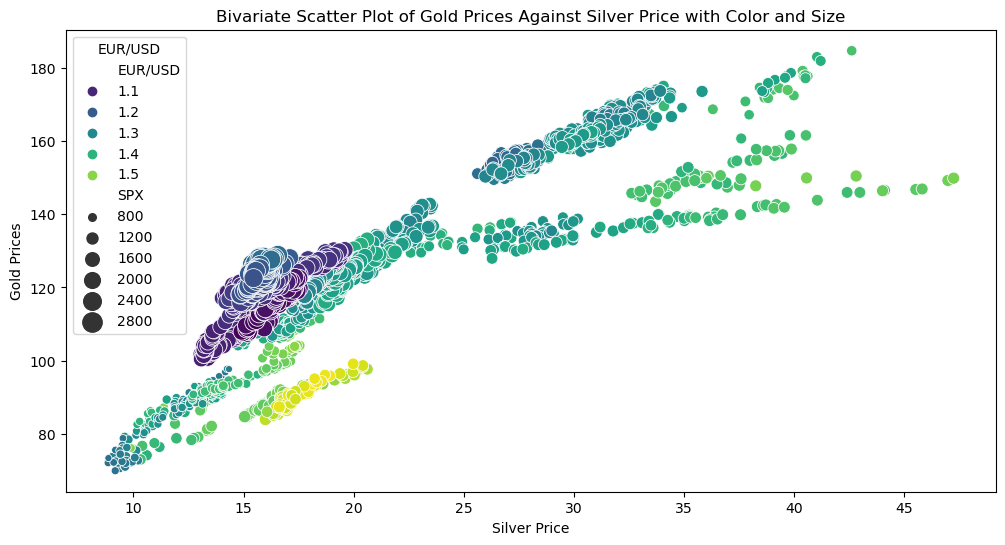

In [60]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='SLV', y='GLD', data=df, hue='EUR/USD', palette='viridis', size='SPX', sizes=(20, 200))
plt.title('Bivariate Scatter Plot of Gold Prices Against Silver Price with Color and Size')
plt.xlabel('Silver Price')
plt.ylabel('Gold Prices')
plt.legend(title='EUR/USD')
plt.show()

C:\Users\Manish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of S&P 500 Prices')

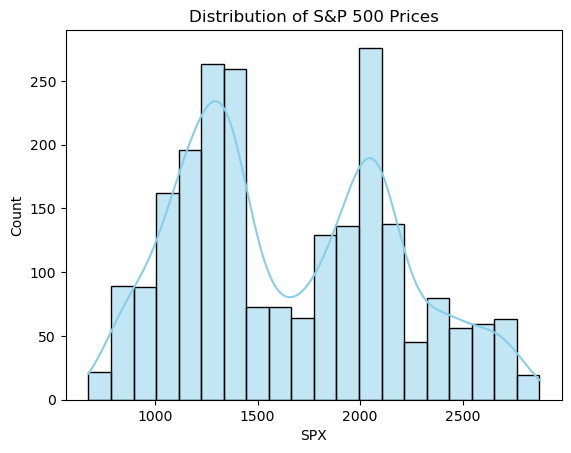

In [64]:
# Distribution of S&P 500 Prices
sns.histplot(df['SPX'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of S&P 500 Prices')

C:\Users\Manish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


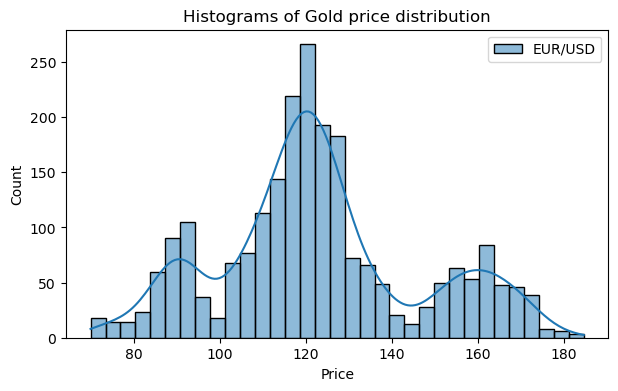

In [65]:
plt.figure(figsize=(7, 4))
sns.histplot(df['GLD'], kde=True, label=column)
plt.title('Histograms of Gold price distribution')
plt.xlabel('Price')
plt.legend()
plt.show()

C:\Users\Manish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Manish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Manish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Manish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

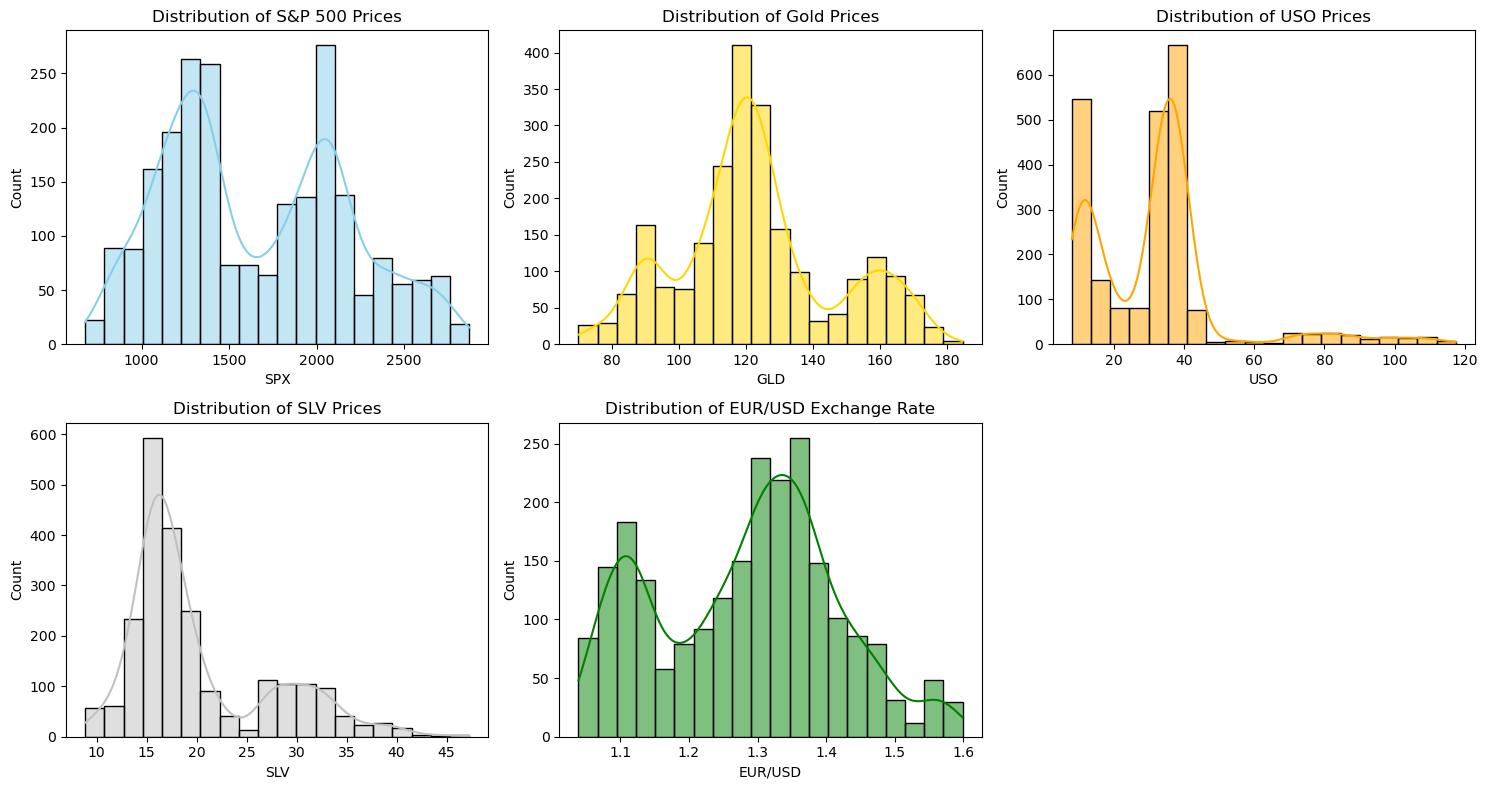

In [71]:
# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Univariate Visualizations - Histograms
sns.histplot(df['SPX'], bins=20, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of S&P 500 Prices')

sns.histplot(df['GLD'], bins=20, kde=True, color='gold', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Gold Prices')

sns.histplot(df['USO'], bins=20, kde=True, color='orange', ax=axes[0, 2])
axes[0, 2].set_title('Distribution of USO Prices')

sns.histplot(df['SLV'], bins=20, kde=True, color='silver', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of SLV Prices')

sns.histplot(df['EUR/USD'], bins=20, kde=True, color='green', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of EUR/USD Exchange Rate')

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

# Feature engineering

In [23]:
df2=df.copy()

In [24]:
df2.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


# Splitting dataset into training and test data set

In [25]:
X=df2.drop(['GLD'], axis=1)
y=df2['GLD']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
len(X_train)

1832

In [27]:
len(y_train)

1832

In [28]:
X_train

,SPX,USO,SLV,EUR/USD
486,1165.810059,39.560001,16.600000,1.356705
31,1349.989990,75.930000,16.952000,1.467610
1754,2041.890015,10.740000,13.080000,1.087453
1490,1862.760010,31.100000,16.670000,1.280442
1526,2026.140015,23.280001,16.370001,1.239495
...,...,...,...,...
1033,1461.050049,34.119999,33.570000,1.305824
1731,2023.040039,13.060000,13.590000,1.081502
763,1283.500000,36.009998,34.369999,1.427002
835,1218.280029,35.200001,32.330002,1.386001


# Model fitting

In [29]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [31]:
#Model training: Random Forest Regressor
regressor=RandomForestRegressor(n_estimators=100)

In [32]:
#training the model
regressor.fit(X_train, y_train)

RandomForestRegressor()

# Model Evaluation

In [33]:
#Prediction on test data
test_data_prediction=regressor.predict(X_test)

In [34]:
print(test_data_prediction)

[127.14229851 116.77529954 139.64040062 121.44669982  94.14230025
 155.0752012  117.595401   113.55540141 153.29490069 105.57040071
 103.2671988  120.24820081  92.16429957 159.33370094 121.56519839
 117.32480143  86.61909828  91.75239917  92.89859935 125.83029971
  83.26679934 117.7836992  126.35049851 173.07329775 169.81759734
 139.74890281 114.28669951 159.92190153 134.13130032 115.46140007
 111.13670107 104.79560181 128.273401   122.15119993  98.70149976
 120.09149966  83.76260053 115.04750014 127.56459863 140.4580989
 107.96560048 131.69960108 108.58249957 135.01549976 133.82689915
 148.77539926 119.60900073 156.72290044 155.87740168 127.65800015
 123.4661003  115.25369842 123.94630064 119.57509983 153.89240046
 121.61899961 112.39400059  86.80209949 155.52639973 117.74700072
  87.98539921 114.60149994  83.39019933 146.3549971  125.09779971
 127.46579874 125.02779969 120.9925998  167.93150132 121.7161994
 125.58340162 173.26719867 121.47480102 170.18070142 119.06820035
 127.0379995

In [44]:
#R squared error
error_score=metrics.r2_score(y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9895688746184477


In [45]:
# compare the actual and predicted values via plot

In [46]:
y_test=list(y_test)

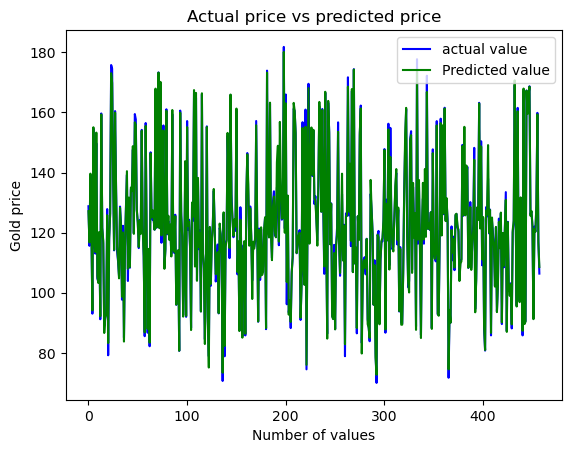

In [47]:
plt.plot(y_test, color='blue', label='actual value')
plt.plot(test_data_prediction, color='green', label='Predicted value')
plt.title("Actual price vs predicted price")
plt.xlabel("Number of values")
plt.ylabel("Gold price")
plt.legend()
plt.show()